# Gamma Distribution

In [5]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns

*这些怪物都喜欢弄一些图出来，到你用的时候，其实并不好用*

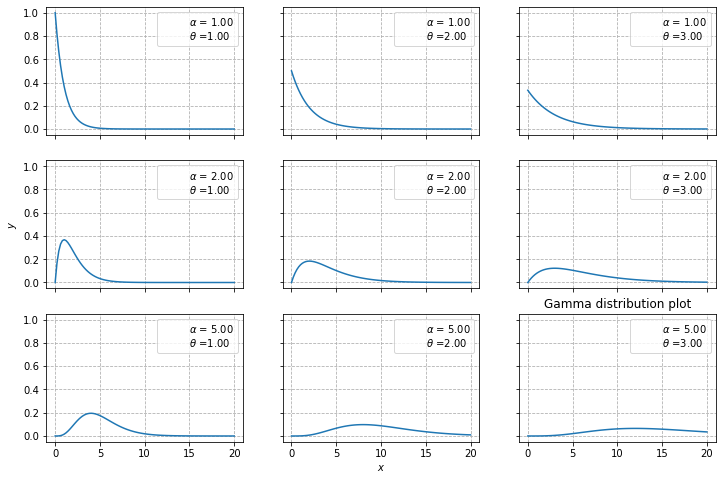

In [14]:
figsize(12,8)

rates = [1,2,5]
scales = [1,2,3]

x = np.linspace(0,20,100)
fig, ax = plt.subplots(len(rates), len(scales), sharex = True, sharey = True)
for i in range(len(rates)):
    for j in range(len(scales)):
        rate = rates[i]
        scale = scales[j]
        rv = stats.gamma(a = rate, scale = scale)
        ax[i,j].plot(x, rv.pdf(x))
        
        ax[i,j].plot(0, 0,label="$\\alpha$ = {:3.2f}\n$\\theta$ ={:3.2f}".format(rate, scale), alpha=0)
        ax[i,j].grid(linestyle = '--')
        ax[i,j].legend(loc = 'upper right')
        
ax[2,1].set_xlabel('$x$')
ax[1,0].set_ylabel('$y$')

plt.show()

*不管如何，我做了一个稍微有一些偏的分布, 貌似这个分布向右偏移，有点儿能力*

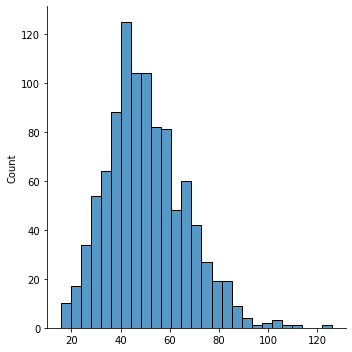

In [33]:
dis = stats.gamma(a = 10, scale = 5)
sns.displot(dis.rvs(1000))
plt.show()

这俩参数到底是个啥

In [40]:
data = []
for a in [1,20,100,200]:
    for scale in [1,10,40,100]:
        data.append([a,scale, 
                     a * scale, 
                     stats.gamma(a = a, scale = scale).rvs(1000).mean()
                    ])
        
data = pd.DataFrame(data, columns = ['a','scale','a*scale','rvs_mean'])

data

,a,scale,a*scale,rvs_mean
0,1,1,1,0.979936
1,1,10,10,9.546057
2,1,40,40,39.208175
3,1,100,100,94.541709
4,20,1,20,20.088651
5,20,10,200,201.624693
6,20,40,800,805.407547
7,20,100,2000,2000.804145
8,100,1,100,100.608370
9,100,10,1000,997.607582


*这个坑爹的参数的意思， 两个数字相乘 = 随机变量的平均值*

### 猜测肯定是不行的，我们先来看文档。

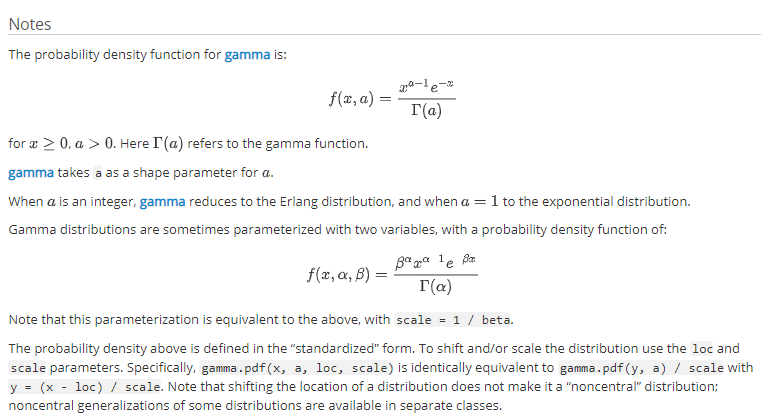

*Gamma 分布参数化有三种方式*
1. 用单一的参数 $a$
2. 用两个参数， $a$, $scale = 1 / beta$
3. 用三个参数   $a$, $scale = 1 / beta$, $loc$

loc是平移参数， scale是形状参数， a 大概是个初始的均值参数吧

#### Important Note: LOC<font color='firebrick'><b>只是平移，只是平移，只是平移</b></font>

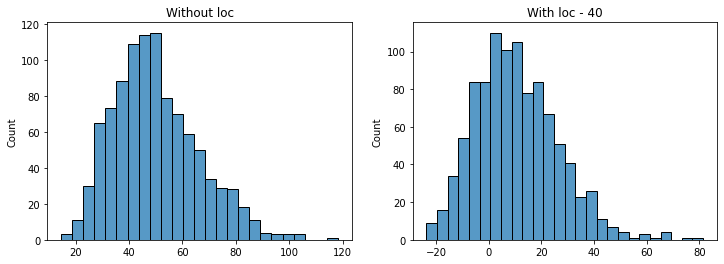

In [54]:
figsize(12,4)
plt.subplot(1,2,1)

dis = stats.gamma(a = 10, scale = 5)
sns.histplot(dis.rvs(1000))
plt.title('Without loc')

plt.subplot(1,2,2)
dis = stats.gamma(a = 10, scale = 5, loc = -40)
sns.histplot(dis.rvs(1000))
plt.title('With loc - 40')
plt.show()

#### Important Note: SCALE只是单纯的<font color='firebrick'><b>加倍，加倍，加倍</b></font>，并不是标准差的意思

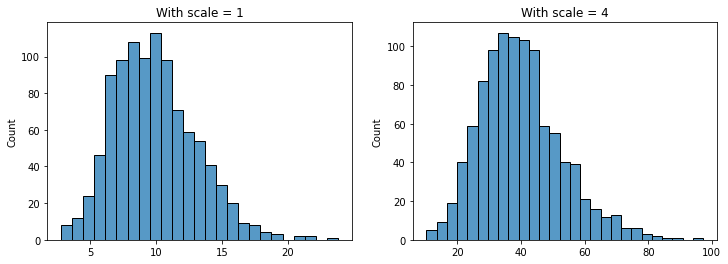

In [56]:
figsize(12,4)
plt.subplot(1,2,1)

dis = stats.gamma(a = 10, scale = 1)
sns.histplot(dis.rvs(1000))
plt.title('With scale = 1')

plt.subplot(1,2,2)
dis = stats.gamma(a = 10, scale = 4)
sns.histplot(dis.rvs(1000))
plt.title('With scale = 4')
plt.show()

按照文档 $a = 1$的时候，gamma分布退化成一个指数分布

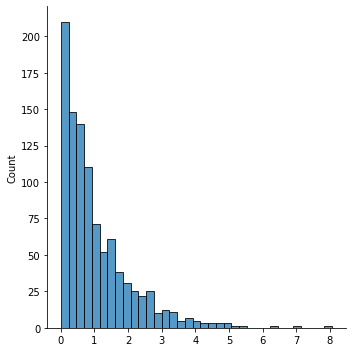

In [58]:
dis = stats.gamma(a = 1, scale = 1)
sns.displot(dis.rvs(1000))
plt.show()

**果然是把$a$稍微增加一点儿，就做出来了lognormal的样子了。哈哈哈哈哈**

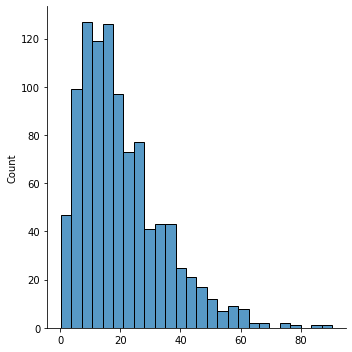

In [60]:
dis = stats.gamma(a = 2, scale = 10)
sns.displot(dis.rvs(1000))
plt.show()

*我们再用loc把这个分布移动到80左右，做成一个arppu分布的样子，貌似也是可以的么*

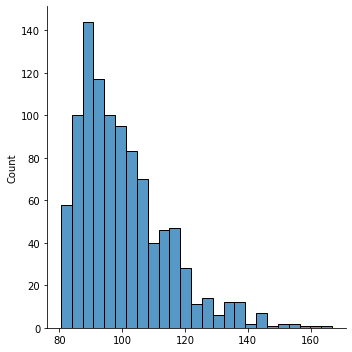

In [61]:
dis = stats.gamma(a = 2, scale = 10, loc = 80)
sns.displot(dis.rvs(1000))
plt.show()

**GAMMA：攻略**           
1. 使用参数$a$把一个分布调整成大概的样子。 
2. 使用scale把分布的数量级弄合理。
3. 使用loc参数移动到你想要的位置。


### 重点是， 当你需要控制形状的时候  $a$ 一定要小，别离1太远


Done...

### Inside Pymc3

In [69]:
import pymc3 as pm

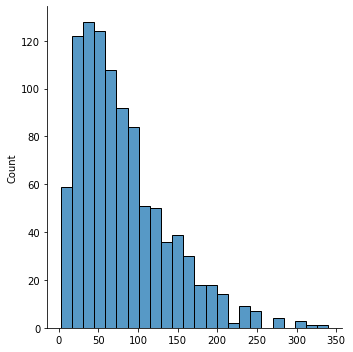

In [89]:
with pm.Model() as model:
    ga = pm.Gamma('ga', alpha = 2, beta = 1/40)
    
sns.displot(ga.random(size = 1000))

In [90]:
ga.random(size = 1000).mean()

78.71797676174282

在pymc3中，这个东西并没有一个scale的参数， instead， 我们需要用beta， 只要把 beta想象成 1 / scale， scale = 1 / beta 就好了

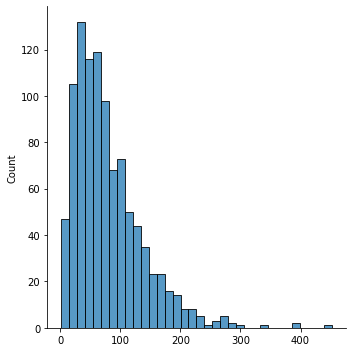

In [97]:
with pm.Model() as model:
    ga = pm.Gamma('ga', alpha = 2, beta = 1/40, mu = 100, sigma = 20)
    
sns.displot(ga.random(size = 1000))

### PYMC 中关于gamma的说明

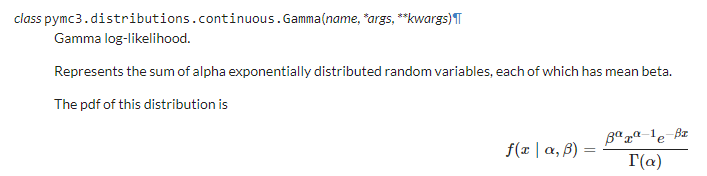

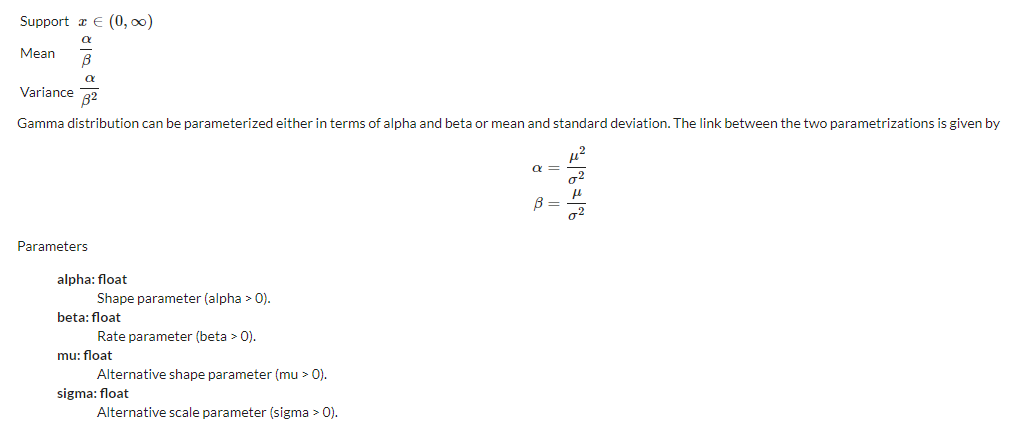

用alpha， beta或者用mu, sigma来描述一个分布

当你用mu, sigma来描述这个分布的时候，如果mu太小了，会报错， 而且计算速度变慢了，试试

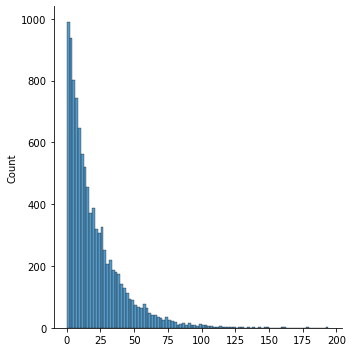

In [114]:
with pm.Model() as model:
    ga = pm.Gamma('ga', mu = 20, sigma = 20)
    
sns.displot(ga.random(size = 10000))

In [111]:
ga.random(size = 10000).mean()

20.351926837156153

In [112]:
ga.random(size = 10000).std()

19.778573698578466

虽然均值和方差都对上了，但是我不知道怎么就弄出来一个指数分布了。。。。。

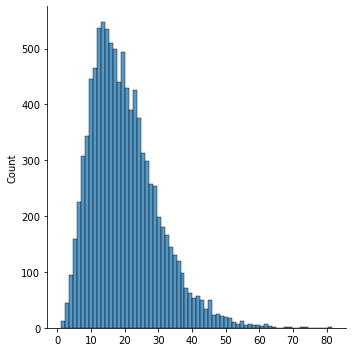

In [117]:
with pm.Model() as model:
    ga = pm.Gamma('ga', mu = 20, sigma = 10)
    
sns.displot(ga.random(size = 10000))

甚至还能大概的lognormal一下，但是我并没法平移它， OK， 或许可以直接加上一个数字，再做一个变量平移